In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [57]:
location = pd.read_table('/Users/carolineroper/Documents/Big Data/by_location_from_to.out', header = -1, skiprows=0)
location.columns = ['Pickup Location', 'Dropoff Location', 'Rides']

In [58]:
location.head()

,Pickup Location,Dropoff Location,Rides
0,152,143,449
1,216,265,76
2,82,77,71
3,36,38,1
4,8,145,26


In [59]:
location[location['Pickup Location']=='D']

,Pickup Location,Dropoff Location,Rides
29849,D,",",6


In [60]:
#how did this happen? I think it's a header
#could be 6 headers of 6 monthly files

#the pyspark code contains something to filter out headers so I wonder why it doesn't work perfectly

In [61]:
location = location[location['Pickup Location']!='D']

In [62]:
location['Pickup Location'] = location['Pickup Location'].astype(int)
location['Dropoff Location'] = location['Dropoff Location'].astype(int)

In [63]:
location.sort(['Dropoff Location'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Pickup Location,Dropoff Location,Rides
29852,1,0,10854626
19954,193,1,6
12161,106,1,17
28415,198,1,3
17903,174,1,4
1592,221,1,1
18054,6,1,1
18123,72,1,1
18287,242,1,1
18454,189,1,28


In [64]:
location.sort(['Pickup Location'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Pickup Location,Dropoff Location,Rides
29853,0,9,10116018
29854,0,7,10294080
29851,0,8,9942263
29855,1,2,10449408
28663,1,14,1
21288,1,22,1
2923,1,1,171
9214,1,257,1
4957,1,145,1
91,1,265,4


In [65]:
#compare total number of rides to what I found in the other analysis

sum(location['Rides'])

#69126025
#Lines up perfectly with what I found in other analysis (note that this is after taking out the D, 6 row)

69126025

In [29]:
sum(location[location['Pickup Location'] == 0]['Rides'])/sum(location['Rides']) #43.9% have pickup location = 0

0.4390873191392099

In [30]:
sum(location[location['Dropoff Location'] == 0]['Rides'])/sum(location['Rides']) #15.7% have a dropoff location = 0

0.15702661913512314

In [33]:
sum(location.loc[(location['Dropoff Location'] != 0) & (location['Pickup Location'] != 0), 'Rides'])\
/sum(location['Rides']) #Only 40.4% have a non-zero location for both pickup and drop off

0.40388606172566699

In [ ]:
#What if the 0 location ID's are coming from a certain date range or they're in the green file but not the yellow?
#0 is not in the location lookup. 265 is unknown.

In [35]:
location[location['Pickup Location'] == 256].head() #256 is also being used

,Pickup Location,Dropoff Location,Rides
135,256,60,2
163,256,258,76
222,256,79,3610
390,256,26,80
501,256,166,114


In [66]:
location_lookup = \
pd.read_csv('/Users/carolineroper/Documents/Big Data/taxi+_zone_lookup.csv', )

In [67]:
location_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [15]:
location_lookup.sort(['LocationID'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [69]:
location_merged = pd.merge(location, location_lookup[['LocationID', 'Borough', 'Zone']],\
                        left_on=['Pickup Location'],\
                        right_on=['LocationID'])

In [70]:
location_merged = pd.merge(location_merged, location_lookup[['LocationID', 'Borough', 'Zone']],\
                        left_on=['Dropoff Location'],\
                        right_on=['LocationID'])

In [71]:
location_merged = location_merged[['Pickup Location', 'Dropoff Location', 'Rides', 'Borough_x', 'Zone_x', 'Borough_y', 'Zone_y']]

location_merged.columns \
= ['Pickup Location', 'Dropoff Location', 'Rides', 'Pickup Borough', 'Pickup Zone', 'Dropoff Borough', 'Dropoff Zone']

In [72]:
location_merged.head()

,Pickup Location,Dropoff Location,Rides,Pickup Borough,Pickup Zone,Dropoff Borough,Dropoff Zone
0,152,143,449,Manhattan,Manhattanville,Manhattan,Lincoln Square West
1,216,143,2,Queens,South Ozone Park,Manhattan,Lincoln Square West
2,82,143,29,Queens,Elmhurst,Manhattan,Lincoln Square West
3,36,143,52,Brooklyn,Bushwick North,Manhattan,Lincoln Square West
4,195,143,19,Brooklyn,Red Hook,Manhattan,Lincoln Square West


In [73]:
sum(location_merged['Rides'])

27919038

In [82]:
location_merged.isnull().sum()

Pickup Location       0
Dropoff Location      0
Rides                 0
Pickup Borough        0
Pickup Zone         194
Dropoff Borough       0
Dropoff Zone        197
dtype: int64

In [84]:
by_borough = \
pd.pivot_table(location_merged, \
               values='Rides', \
               index=['Pickup Borough'], \
               columns=['Dropoff Borough'], \
               aggfunc=np.sum).fillna(0)

In [85]:
by_borough

Dropoff Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Pickup Borough,,,,,,,
Bronx,230810.0,1760.0,39.0,72640.0,5649.0,34.0,3995.0
Brooklyn,3956.0,2127853.0,1524.0,423108.0,148606.0,1381.0,4595.0
EWR,0.0,3.0,10102299.0,1.0,10449409.0,0.0,4.0
Manhattan,185240.0,14673.0,1285.0,1960997.0,59979.0,88.0,5931.0
Queens,8951.0,84906.0,294.0,153659.0,1842447.0,151.0,7603.0
Staten Island,0.0,246.0,8.0,19.0,21.0,1132.0,19.0
Unknown,1847.0,2276.0,45.0,1915.0,2275.0,16.0,5349.0


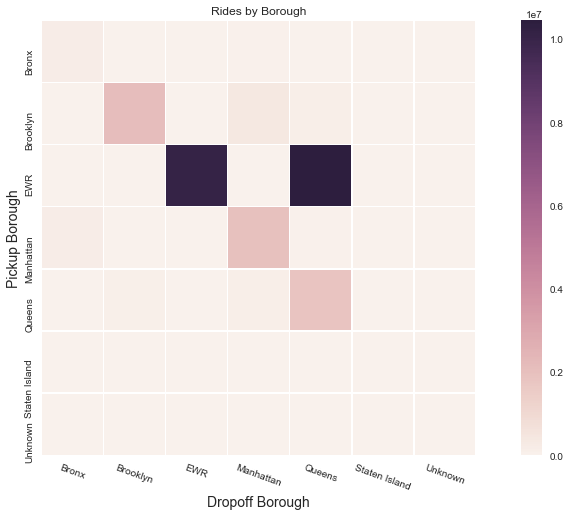

In [100]:
plt.figure(figsize=(16,8))
plt.title('Rides by Borough'.format(size = 20))
plt.xlabel('Pickup', size = 14)
plt.ylabel('Dropoff', size = 14)
plt.xticks(rotation=-20)
plt.yticks(rotation=-70)

sns.heatmap(by_borough,
            annot=False,
            fmt='.0f',
            linewidths=.5,
            square=True,
            cbar_kws={"orientation":'vertical'}
            )
plt.show()

In [ ]:
#Weird that there are tons of ride from AND to EWR. Does this mean people are taking cabs around the Newark airport area?
#Or does the system record EWR in both places if the either the pickup OR the dropoff is EWR?

In [104]:
by_pickup_zone = \
pd.pivot_table(location_merged, \
               values='Rides', \
               index=['Pickup Zone'], \
               aggfunc=np.sum).fillna(0)

In [109]:
by_pickup_zone.sort_values(ascending=False)[1:10]

Pickup Zone
East Harlem North            414336
Central Harlem               401061
Astoria                      357081
East Harlem South            344590
Williamsburg (North Side)    317145
Elmhurst                     310837
Morningside Heights          272610
Central Harlem North         264950
Park Slope                   253800
Name: Rides, dtype: int64

In [110]:
by_dropoff_zone = \
pd.pivot_table(location_merged, \
               values='Rides', \
               index=['Dropoff Zone'], \
               aggfunc=np.sum).fillna(0)

In [111]:
by_dropoff_zone.sort_values(ascending=False)[1:10]

Dropoff Zone
Newark Airport          10105494
Central Harlem North      236016
East Harlem North         232634
Astoria                   221853
Central Harlem            210571
Jackson Heights           201447
Park Slope                175020
Elmhurst                  147111
Crown Heights North       143797
Name: Rides, dtype: int64